In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg');
import matplotlib.pyplot as plt
#plt.set_cmap('jet');
import random, os, sys, pandas, os, pickle
import argparse
%matplotlib inline

In [192]:
##############################################
##############################################
##############################################
##############################################
## below is code to plot the results of running this with "run.sh classify.ipynb"
## e.g "run.sh classify.ipynb -thing -nsamples 32 -seed 4"
## it writes a pickle file with the results for each run.


In [306]:
df = pandas.DataFrame()
for f in os.listdir("stats"):
    d = (pickle.load(open("stats/" + f,"rb")))
    df = df.append(pandas.DataFrame(d))

In [307]:
df.shape

(33000, 7)

In [308]:
df.head(1)

,epoch,maxmasks,nsamples,seed,thing,trainloss,validauc
0,0,0,64,10,True,0.68538,0.5


In [309]:
print (df.thing.unique())
print (df.nsamples.unique())
print (df.maxmasks.unique())

[ True False]
[64]
[ 0  2 64  1  8]


In [310]:
df[(df.nsamples == 64) & (df.epoch == 499)].groupby(["epoch","thing", "maxmasks"]).count()

nsamples  seed  trainloss  validauc
epoch thing maxmasks                                     
499   False 64              11    11         11        11
      True  0               11    11         11        11
            1               11    11         11        11
            2               11    11         11        11
            8               11    11         11        11
            64              11    11         11        11

In [311]:
df[(df.nsamples == 64) & (df.epoch == 499)].groupby(["epoch","thing", "seed", "maxmasks"]).mean()

nsamples  trainloss  validauc
epoch thing seed maxmasks                               
499   False 0    64              64   0.000092  0.755682
            1    64              64   0.000032  0.706652
            2    64              64   0.000158  0.739849
            3    64              64   0.000153  0.713164
            4    64              64   0.000013  0.712334
            5    64              64   0.000062  0.785144
            6    64              64   0.000196  0.743903
            7    64              64   0.000052  0.816075
            8    64              64   0.000329  0.659346
            9    64              64   0.000125  0.682808
            10   64              64   0.000118  0.761427
      True  0    0               64   0.000042  0.761332
                 1               64   0.185403  0.816682
                 2               64   0.500509  0.809723
                 8               64   0.100639  0.816713
                 64              64   0.040372  0.808255
            1    0               64   0.000042  0.699662
                 1               64   0.162273  0.721208
                 2               64   0.106513  0.725389
                 8               64   0.118010  0.735476
                 64              64   0.102274  0.725517
            2    0               64   0.000110  0.741254
                 1               64   0.131578  0.757948
                 2               64   0.134543  0.722740
                 8               64   0.109663  0.738189
                 64              64   0.437032  0.712142
            3    0               64   0.000127  0.710387
                 1               64   0.374371  0.759927
                 2               64   0.824653  0.792582
                 8               64   0.266182  0.745531
...                             ...        ...       ...
            5    0               64   0.000063  0.787889
                 1               64   0.290761  0.809404
                 2               64   0.227468  0.808287
                 8               64   0.103837  0.803658
                 64              64   0.036454  0.803722
            6    0               64   0.000104  0.765066
                 1               64   0.121308  0.761300
                 2               64   0.104831  0.768163
                 8               64   0.239745  0.729635
                 64              64   0.228270  0.763726
            7    0               64   0.000036  0.796189
                 1               64   0.236157  0.810681
                 2               64   0.087088  0.803562
                 8               64   0.150454  0.824662
                 64              64   0.032232  0.803530
            8    0               64   0.000326  0.659346
                 1               64   0.068497  0.798966
                 2               64   0.166082  0.842984
                 8               64   0.122400  0.854252
                 64              64   0.029745  0.855688
            9    0               64   0.000188  0.682776
                 1               64   0.373383  0.754948
                 2               64   0.404804  0.760853
                 8               64   0.152446  0.749234
                 64              64   0.122365  0.740967
            10   0               64   0.000137  0.771291
                 1               64   0.242463  0.798136
                 2               64   0.203188  0.796668
                 8               64   0.229676  0.788304
                 64              64   0.044037  0.778377

[66 rows x 3 columns]

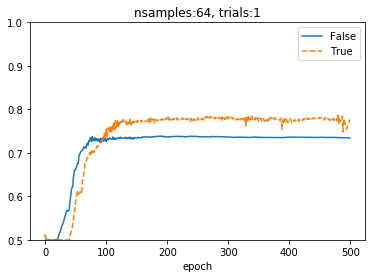

In [312]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]
plt.ylim(.5, 1.0);
for k,i in enumerate(sorted(df.thing.unique())):
    thisdata = df[(df.nsamples == 64) & (df.maxmasks == 64) & (df.thing == i)].groupby(["epoch"]).mean()
    r = thisdata.plot(y="validauc", ax=ax, label=str(i), ls=ls[k])

plt.title("nsamples:" + str(thisdata.nsamples.unique()[0]) + ", trials:" + str(thisdata.seed.unique().shape[0]));


In [313]:
#df.maxmasks.unique()

0
1
2
8
64


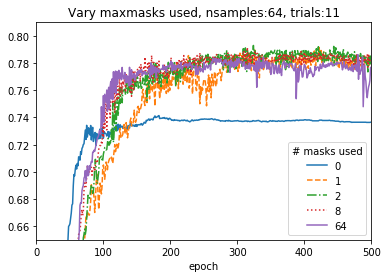

In [315]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]
for k,i in enumerate(sorted(df.maxmasks.unique())):
    thisdata = df[(df.nsamples == 64) & (df.thing == True) & (df.maxmasks == i)]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i)
    plt.legend(title="# masks used")
plt.ylim(.65, 0.81);
plt.xlim(0,500);

plt.title("Vary maxmasks used, nsamples:" + str(thisdata.nsamples.unique()[0]) + ", trials:" + str(thisdata.seed.unique().shape[0]));
